In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset

df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

# Display first rows
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [3]:
# viewing the data types of columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [6]:
 #finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (768, 9) 

number of rows:  768
number of columns:  9


In [7]:
# Statistical summary
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


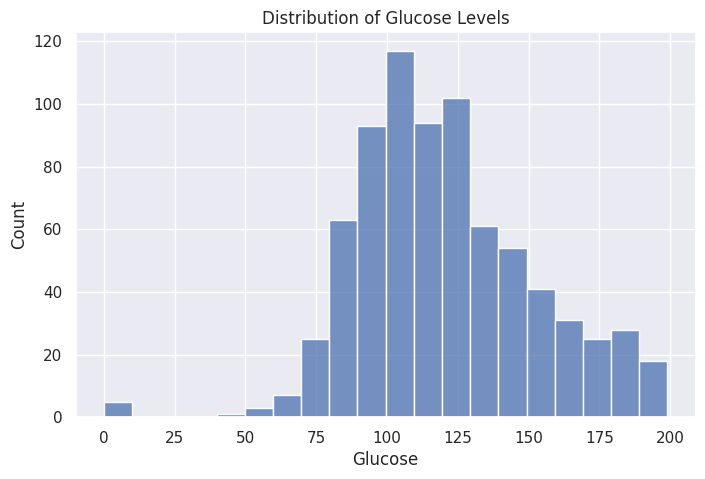

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], bins=20)
plt.title("Distribution of Glucose Levels")
plt.show()

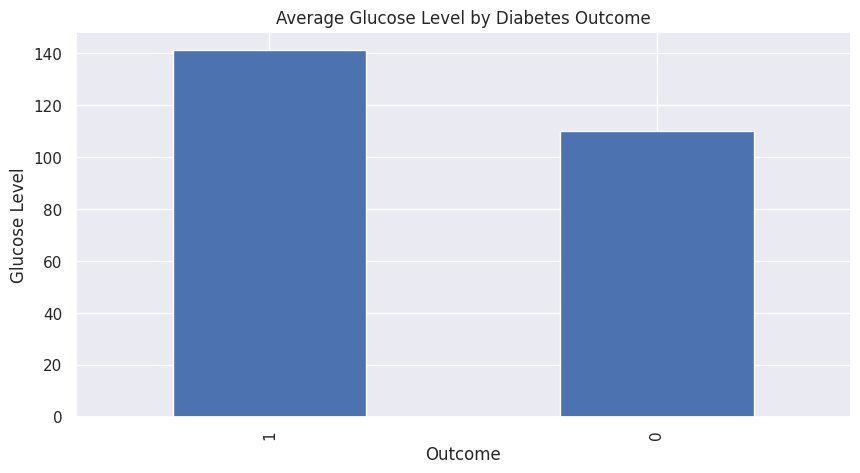

Outcome
1    141.257463
0    109.980000
Name: Glucose, dtype: float64

In [9]:
glucose_outcome = df.groupby('Outcome')['Glucose'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
glucose_outcome.plot(kind='bar')
plt.title("Average Glucose Level by Diabetes Outcome")
plt.ylabel("Glucose Level")
plt.show()

glucose_outcome

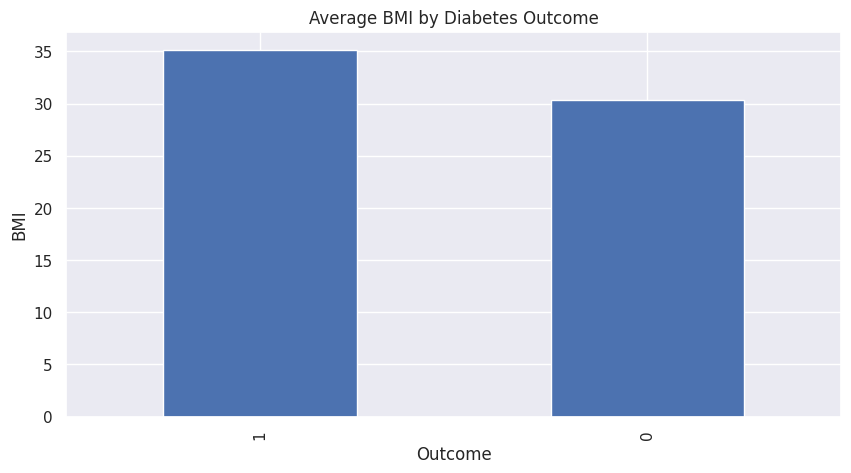

Outcome
1    35.142537
0    30.304200
Name: BMI, dtype: float64

In [10]:
bmi_outcome = df.groupby('Outcome')['BMI'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
bmi_outcome.plot(kind='bar')
plt.title("Average BMI by Diabetes Outcome")
plt.ylabel("BMI")
plt.show()

bmi_outcome

In [12]:
#Age groups most at risk of diabetes

age_outcome = df.groupby('Outcome')['Age'].mean().sort_values(ascending=False)

age_outcome.head(10)

Outcome
1    37.067164
0    31.190000
Name: Age, dtype: float64

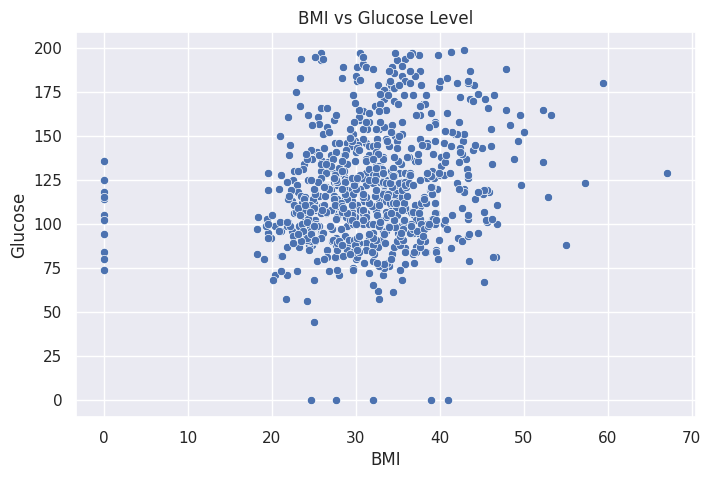

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='BMI', y='Glucose', data=df)
plt.title("BMI vs Glucose Level")
plt.show()

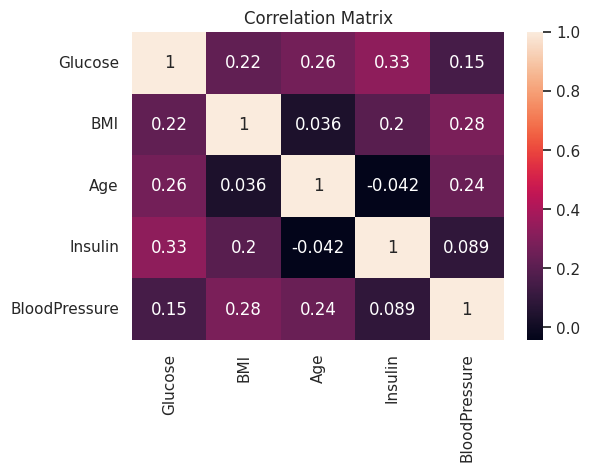

In [15]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['Glucose','BMI','Age','Insulin','BloodPressure']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

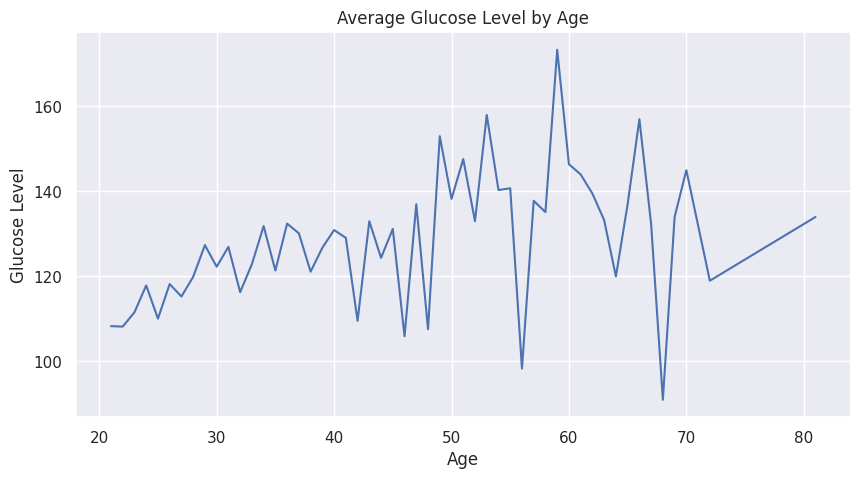

In [16]:
age_glucose = df.groupby('Age')['Glucose'].mean()

plt.figure(figsize=(10,5))
age_glucose.plot()
plt.title("Average Glucose Level by Age")
plt.ylabel("Glucose Level")
plt.show()